# Genotype–phenotype correlation of β‑lactamase‑producing uropathogenic Escherichia coli (UPEC) strains from Bangladesh

The following script is written to create a heat map for the 46 strains isolated from patients from Dhaka Hospital.

In [2]:
# Starting Python Script
# Author: Abdulhakim Tofik
# Date: April 25th 2024
# Description: This script documents a heat map showing different strains extracted from Dhaka Hospital and 

import pandas as pd
import seaborn as sns #package willl be used to create interactive plots
import matplotlib.pyplot as plt


In [3]:
# Load the original CSV file
Dhaka_Hospital = pd.read_csv("Table_S1_Dhaka_Hospital.csv")

#print the first 5 lines to look at the file headers.
print (Dhaka_Hospital.head(5))



          Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 ESBL  \
0  DHAKA HOSPITAL ID        NaN        NaN        NaN  SAMPLE TYPE  NaN   
1                NaN  STRAIN ID     GENDER        AGE          NaN  NaN   
2              77827   NGCE-002       MALE         28        URINE    -   
3              78463   NGCE-003     FEMALE         39        URINE    -   
4              78773   NGCE-004       MALE         64        URINE    -   

  Amikacin Amoxyclave Aztreonam Cefepime  ... Gentamicin Imipenem  \
0      NaN        NaN       NaN      NaN  ...        NaN      NaN   
1      NaN        NaN       NaN      NaN  ...        NaN      NaN   
2        S          R         S        R  ...          R        S   
3        S          S         S        S  ...          S        S   
4        S          R         S        S  ...          S        S   

  Levofloxacin Meropenem Nalidixic Acid Netilmicin Nitrofurantoin  \
0          NaN       NaN            NaN        NaN            NaN

From the previous we can see that the strain Id starts below the header. so we create a new file to have the strain ID as the header for later analysis.


In [15]:
# The 'STRAIN ID' starts on the third row (index 2, since pandas is zero-indexed)
# Adjust the number based on the actual file
DH_Strain_ID_header = pd.read_csv('Table_S1_Dhaka_Hospital.csv', header=2)

# Now the DataFrame should be correctly formatted with 'STRAIN ID' as the header
# Verify the header
print(DH_Strain_ID_header.head()) #DH_Strain_ID_header is for strains from Dhaka hospital and strain is set as a header

  Unnamed: 0 STRAIN ID  GENDER  AGE Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0      77827  NGCE-002    MALE   28      URINE          -          S   
1      78463  NGCE-003  FEMALE   39      URINE          -          S   
2      78773  NGCE-004    MALE   64      URINE          -          S   
3      77937  NGCE-005  FEMALE   18      URINE          -          S   
4      79078  NGCE-006    MALE   24      URINE          -          S   

  Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 18 Unnamed: 19 Unnamed: 20  \
0          R          S          R  ...           R           S           R   
1          S          S          S  ...           S           S           S   
2          R          S          S  ...           S           S           R   
3          R          S          R  ...           S           S           S   
4          S          S          S  ...           S           S           S   

  Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26  \
0           S  

Now create the new csv file with 'Strain ID' being the header

In [17]:
#Save the DataFrame to a new CSV file
DH_Strain_ID_header.to_csv('DH_Strain_ID_header', index=False)

#verify the dataframe
DH_Strain_ID_header


,Unnamed: 0,STRAIN ID,GENDER,AGE,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,77827,NGCE-002,MALE,28,URINE,-,S,R,S,R,...,R,S,R,S,R,S,R,R,S,S
1,78463,NGCE-003,FEMALE,39,URINE,-,S,S,S,S,...,S,S,S,S,R,S,S,S,S,S
2,78773,NGCE-004,MALE,64,URINE,-,S,R,S,S,...,S,S,R,S,R,S,S,S,S,S
3,77937,NGCE-005,FEMALE,18,URINE,-,S,R,S,R,...,S,S,S,S,R,S,S,S,S,S
4,79078,NGCE-006,MALE,24,URINE,-,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
5,78156,NGCE-007,FEMALE,71,URINE,-,S,R,S,R,...,S,S,R,S,R,S,S,S,S,S
6,80245,NGCE-009,MALE,35,URINE,-,S,R,S,S,...,S,S,S,S,S,S,S,S,S,S
7,100001,NGCE-032,MALE,37,URINE,-,S,S,R,S,...,S,S,R,S,R,S,S,S,S,S
8,200002,NGCE-033,FEMALE,1,URINE,-,R,R,R,R,...,R,R,R,R,R,R,R,R,S,S
9,300003,NGCE-034,MALE,1,URINE,-,R,R,R,R,...,R,R,R,S,R,R,R,R,S,S


Now that we have created a separate file for to have 'Strain ID' as a header we will extract the Strain ID column alone

In [23]:
#read the DH_Strain_ID_header
DH_Strain_ID_header= pd.read_csv('DH_Strain_ID_header')

# Extract "STRAIN ID"
Strain_ID_column = DH_Strain_ID_header[['STRAIN ID']]  # Double brackets to keep it as a DataFrame
Strain_ID_column.to_csv('Strain_ID_column.csv', index=False)

#verify the dataframe
Strain_ID_column


,STRAIN ID
0,NGCE-002
1,NGCE-003
2,NGCE-004
3,NGCE-005
4,NGCE-006
5,NGCE-007
6,NGCE-009
7,NGCE-032
8,NGCE-033
9,NGCE-034


We will then create another file for the antibiotics columns from the "Table_S1_Dhaka_Hospital"; however, the data starts from the second row and we have to keep that in mind when creating the file for the antibiotic csv file

In [34]:
#read the originaal table from Dhaka hospital
#keep the header and skip rows 1 and 2
Table_S1_Dhaka_Hospital = pd.read_csv('Table_S1_Dhaka_Hospital.csv', header=0, skiprows=[1,2]) 
 
Table_S1_Dhaka_Hospital

# Extract columns by index range: columns 7 to 28 (contains the antibiotics used in this dataframe)
DH_Antibiotics= Table_S1_Dhaka_Hospital.iloc[:, 6:28]  # select the antibiotics used
DH_Antibiotics.to_csv('DH_Antibiotics.csv', index=False)

#verify the new file
DH_Antibiotics


,Amikacin,Amoxyclave,Aztreonam,Cefepime,Cefixime,Cefotaxime,Ceftazidime,Ceftriaxone,Cefuroxime,Ciprofloxacin,...,Gentamicin,Imipenem,Levofloxacin,Meropenem,Nalidixic Acid,Netilmicin,Nitrofurantoin,Piperacillin/ Tazobactum,Polymixin B,Tigecycline
0,S,R,S,R,R,R,S,R,R,R,...,R,S,R,S,R,S,R,R,S,S
1,S,S,S,S,S,S,S,S,S,R,...,S,S,S,S,R,S,S,S,S,S
2,S,R,S,S,S,S,S,S,S,R,...,S,S,R,S,R,S,S,S,S,S
3,S,R,S,R,R,R,S,S,S,S,...,S,S,S,S,R,S,S,S,S,S
4,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
5,S,R,S,R,R,R,S,R,R,R,...,S,S,R,S,R,S,S,S,S,S
6,S,R,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
7,S,S,R,S,R,R,S,R,R,R,...,S,S,R,S,R,S,S,S,S,S
8,R,R,R,R,R,R,R,R,R,R,...,R,R,R,R,R,R,R,R,S,S
9,R,R,R,R,R,R,R,R,R,R,...,R,R,R,S,R,R,R,R,S,S


Finally we now can join the Strain_ID file and the antibiotic file

In [36]:
# Load both CSV files
Strain_ID_column = pd.read_csv('Strain_ID_column.csv')
DH_Antibiotics= pd.read_csv('DH_Antibiotics.csv')

# Join them side by side assuming they are in the same order and have the same length

DH_Strains= Strain_ID_column.join(DH_Antibiotics) #DH_Strains now will contiain strains and the antibiotic from Dhaka hospital
DH_Strains.to_csv('DH_Strains', index=False)

#verify DH_Strains
DH_Strains

,STRAIN ID,Amikacin,Amoxyclave,Aztreonam,Cefepime,Cefixime,Cefotaxime,Ceftazidime,Ceftriaxone,Cefuroxime,...,Gentamicin,Imipenem,Levofloxacin,Meropenem,Nalidixic Acid,Netilmicin,Nitrofurantoin,Piperacillin/ Tazobactum,Polymixin B,Tigecycline
0,NGCE-002,S,R,S,R,R,R,S,R,R,...,R,S,R,S,R,S,R,R,S,S
1,NGCE-003,S,S,S,S,S,S,S,S,S,...,S,S,S,S,R,S,S,S,S,S
2,NGCE-004,S,R,S,S,S,S,S,S,S,...,S,S,R,S,R,S,S,S,S,S
3,NGCE-005,S,R,S,R,R,R,S,S,S,...,S,S,S,S,R,S,S,S,S,S
4,NGCE-006,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
5,NGCE-007,S,R,S,R,R,R,S,R,R,...,S,S,R,S,R,S,S,S,S,S
6,NGCE-009,S,R,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,S
7,NGCE-032,S,S,R,S,R,R,S,R,R,...,S,S,R,S,R,S,S,S,S,S
8,NGCE-033,R,R,R,R,R,R,R,R,R,...,R,R,R,R,R,R,R,R,S,S
9,NGCE-034,R,R,R,R,R,R,R,R,R,...,R,R,R,S,R,R,R,R,S,S


# Heat Map for strains obtained from Dhaka Hospital

Once we have created the files needed to plot a visual representation of the strains and the different antibiotics

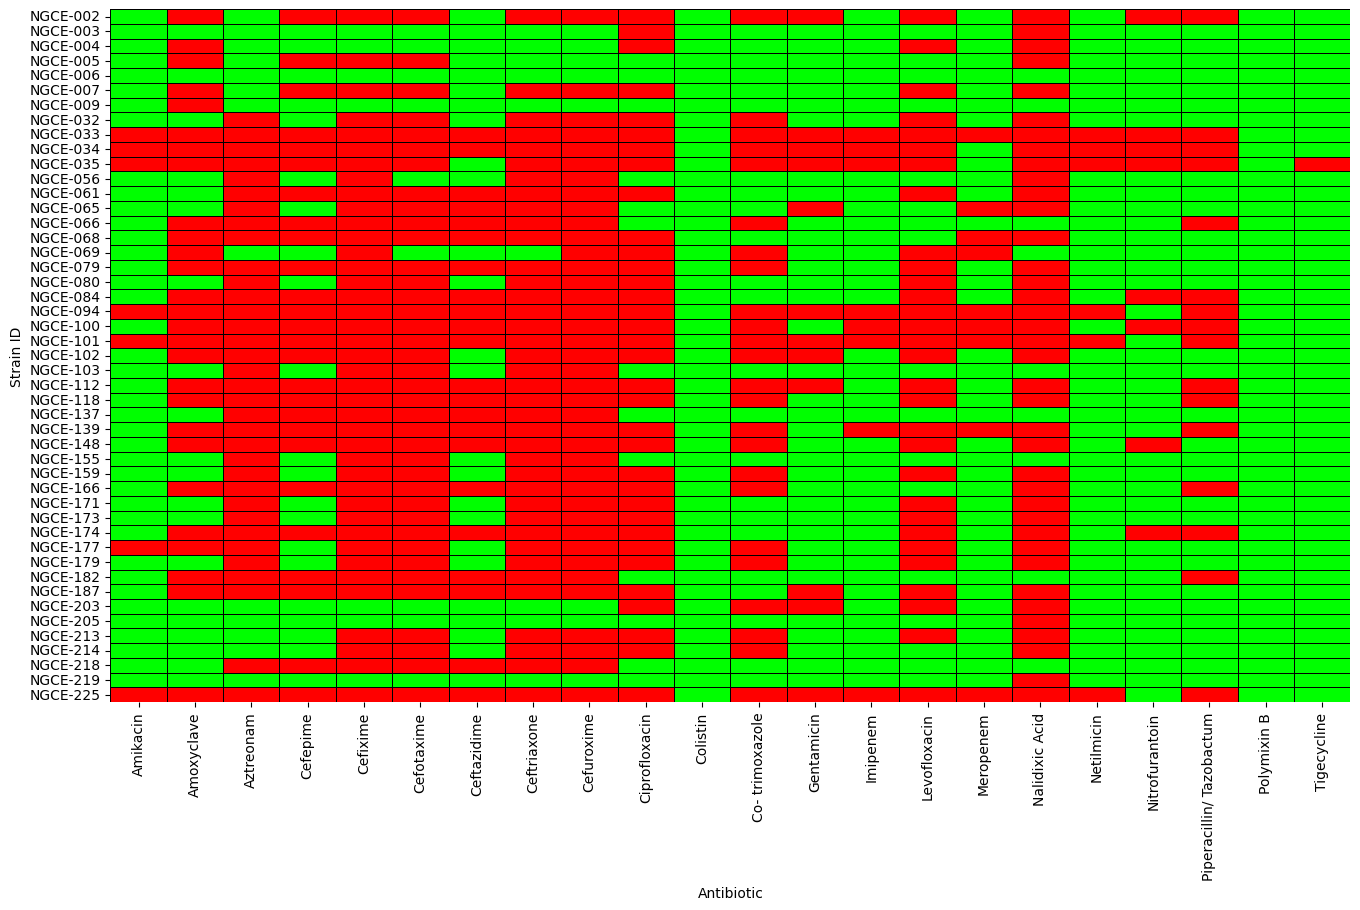

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Load the data from CSV
DH_Strains = pd.read_csv('DH_Strains')

# Set the 'STRAIN ID' column as the index
DH_Strains.set_index('STRAIN ID', inplace=True)

# Map 'S' to 0 and 'R' to 1
DH_Strains= DH_Strains.apply(lambda x: x.map({'S': 0, 'R': 1}), axis=1)

# Define a color map for S and R
cmap = ListedColormap(['lime', 'red'])

# Create the heatmap
plt.figure(figsize=(16, 9))  # Adjust the figure size as needed
sns.heatmap(DH_Strains, cmap=cmap, cbar=False, linewidths=0.5, linecolor='black', annot=False)

# Define legend labels and their corresponding colors
legend_labels = ['Sensitive', 'Resistant']
colors = ['lime', 'red']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]


#define the axis labels for X and Y
plt.xlabel('Antibiotic')
plt.ylabel('Strain ID')

# Optionally, remove the color bar by passing cbar=False to sns.heatmap()

# Save the heatmap to a file
plt.savefig('strain_antibiotic_heatmap.png', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
